# Kaggle
## Titanic competition

# Data exploration

## Data import

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display 
import seaborn as sns; sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances_argmin, silhouette_score, accuracy_score, confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from keras import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint  
from sklearn.model_selection import StratifiedKFold
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


In [139]:
# Load the dataset
try:
    dataset = pd.read_csv("data/train.csv")
    print("Passengers dataset has {} samples with {} features each.".format(*dataset.shape))
except Exception as e:
    print("Dataset could not be loaded. Is the dataset missing? ", str(e))

Passengers dataset has 891 samples with 12 features each.


Lets take a first look to dataset. We are interested in knowing number, type, range of values and empty parameters in order to take further decisions about.

In [140]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Let's first check how many empty values are in each feature. 

In [141]:
for (columnName, columnData) in dataset.iteritems():
   empty_values = columnData.isna().sum()
   print('Colunm: ', columnName, '** Empty : ', empty_values, '** Empty percentage: ', empty_values/len(columnData))

Colunm:  PassengerId ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Survived ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Pclass ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Name ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Sex ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Age ** Empty :  177 ** Empty percentage:  0.19865319865319866
Colunm:  SibSp ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Parch ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Ticket ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Fare ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Cabin ** Empty :  687 ** Empty percentage:  0.7710437710437711
Colunm:  Embarked ** Empty :  2 ** Empty percentage:  0.002244668911335578


In [143]:
dataset.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Cabin seems to be a useless feature as most (77%) of records contains an empty value. Let's check it relevance in survived column

In [112]:
dataset.groupby('Cabin').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
A10,584.0,0.0,1.0,36.00,0.0,0.00,40.125000
A14,476.0,0.0,1.0,NaN,0.0,0.00,52.000000
A16,557.0,1.0,1.0,48.00,1.0,0.00,39.600000
A19,285.0,0.0,1.0,NaN,0.0,0.00,26.000000
A20,600.0,1.0,1.0,49.00,1.0,0.00,56.929200
...,...,...,...,...,...,...,...
F33,310.0,1.0,2.0,29.00,0.0,0.00,11.333333
F38,777.0,0.0,3.0,NaN,0.0,0.00,7.750000
F4,401.5,1.0,2.0,2.50,2.0,1.00,39.000000


Absolutely none. Let's remove it. At a first glance PassengerId seems to also be a useless feature for prediction

In [113]:
dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Cabin', axis=1, inplace=True)

Another "suspicious" feature is "Name". If it only contains a single value per record, we delete it

In [114]:
print(len(dataset['Name'].unique()))

891


In [115]:
dataset.drop('Name', axis=1, inplace=True)

In [116]:
print(len(dataset['Ticket'].unique()))
dataset['Ticket'].value_counts()

681


1601            7
CA. 2343        7
347082          7
347088          6
3101295         6
               ..
2625            1
364498          1
368323          1
F.C.C. 13528    1
28134           1
Name: Ticket, Length: 681, dtype: int64

In [117]:
dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C


In [118]:
dataset.groupby('Ticket').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Ticket,,,,,,
110152,1.000000,1.0,26.333333,0.000000,0.000000,86.500
110413,0.666667,1.0,36.333333,0.666667,1.333333,79.650
110465,0.000000,1.0,47.000000,0.000000,0.000000,52.000
110564,1.000000,1.0,28.000000,0.000000,0.000000,26.550
110813,1.000000,1.0,60.000000,1.000000,0.000000,75.250
...,...,...,...,...,...,...
W./C. 6608,0.000000,3.0,23.500000,1.500000,2.500000,34.375
W./C. 6609,0.000000,3.0,NaN,0.000000,0.000000,7.550
W.E.P. 5734,0.000000,1.0,46.000000,1.000000,0.000000,61.175


In [119]:
dataset.drop('Ticket', axis=1, inplace=True)
dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Let's see graphically which is the disease distribution inside dataset.

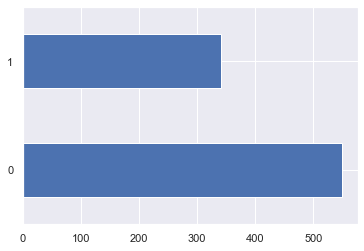

In [120]:
dataset['Survived'].value_counts()[:20].plot(kind='barh')

In [121]:
print(len(dataset['Fare'].unique()))
dataset.describe()
#dataset.groupby('Fare').mean()

248


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data preprocessing

Actions:
- One hot encoding
- To categorical
- Data regularizarion
Fare is some kind of cathegorical value. Let's split into 4 different categories.
- 0 to 8
- 8.1 to 14.5
- 14.6 to 31
- More than 31

In [122]:
dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [123]:
dataset['Sex'].replace(['female','male'],[0,1],inplace=True)
dataset['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [124]:
dataset
dataset = dataset.dropna()

In [125]:
print(dataset['Survived'])
# Split the data into features and target label
diagnosis_raw = dataset['Survived']
features_raw = dataset.drop('Survived', axis = 1)
# Get number of deseases. We are going to use it for, for instance, set the output layer size in the prediction section
number_of_diseases = len(diagnosis_raw.unique())

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


Let going to log transform to numerical values to ensure all values are in range [0,1]

In [127]:
# Log transform numerical value colums
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[['Age','Fare']] = features_raw[['Age','Fare']].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[['Age','Fare']] = scaler.fit_transform(features_log_transformed[['Age','Fare']])

display(features_log_minmax_transform.head(n = 5))

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.808082,1,0,0.573149,0.0
1,1,0,0.894863,1,0,0.840530,1.0
2,3,0,0.835552,0,0,0.585763,0.0
3,1,0,0.882361,1,0,0.812024,0.0
4,3,1,0.882361,0,0,0.587961,0.0


## Remove outliers

In [171]:
# For each integer feature find the data points with extreme high or low values
# List to store outliers detected in loop
dataset = features_log_minmax_transform
all_outliers = []
for feature in int_value_columns :
    
    Q1 = np.percentile(dataset[feature], 25)
    Q3 = np.percentile(dataset[feature], 75)
    step = (Q3 - Q1)*1.5
    
    feature_outliers = dataset[~((dataset[feature] >= Q1 - step) & (dataset[feature] <= Q3 + step))]
    if len(feature_outliers) == 0 :
        continue
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(feature_outliers)
    
    all_outliers.extend(feature_outliers.index.values)
    
import collections
outliers =  [item for item, count in collections.Counter(all_outliers).items() if count > 1]
# Remove the outliers present in more than one feature, if any were specified
#good_data = dataset.drop(dataset.index[outliers]).reset_index(drop = True)
print('Outliers detected in more than one feature:',len(outliers))
print('Original records:',len(dataset))
print('Records once outliers have been removed:',len(good_data))


Data points considered outliers for the feature 'Age':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,1.0,0.693147,0.184964,0.773706,0.356207,0.495832,0.63093
10,0.0,0.000000,0.311287,0.386853,0.356207,0.460439,0.63093
16,1.0,0.693147,0.184964,0.898244,0.356207,0.545650,0.00000
43,0.0,0.000000,0.256106,0.386853,0.564575,0.601092,1.00000
50,1.0,0.693147,0.427516,0.898244,0.356207,0.593810,0.63093
58,0.0,0.000000,0.356374,0.386853,0.564575,0.538164,0.63093
63,1.0,0.693147,0.311287,0.773706,0.564575,0.538998,0.63093
78,1.0,0.693147,0.062728,0.000000,0.564575,0.544984,0.63093
119,0.0,0.000000,0.184964,0.898244,0.564575,0.556696,0.63093
164,1.0,0.693147,0.084695,0.898244,0.356207,0.593810,0.63093


Data points considered outliers for the feature 'Fare':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,1.0,0.693147,0.654108,0.773706,0.564575,0.893450,0.63093
88,0.0,0.000000,0.699194,0.773706,0.564575,0.893450,0.63093
118,1.0,0.693147,0.709289,0.000000,0.356207,0.883769,1.00000
179,1.0,0.693147,0.806239,0.000000,0.000000,0.000000,0.63093
258,0.0,0.000000,0.799463,0.000000,0.000000,1.000000,1.00000
263,1.0,0.693147,0.831624,0.000000,0.000000,0.000000,0.63093
271,1.0,0.693147,0.718988,0.000000,0.000000,0.000000,0.63093
299,0.0,0.000000,0.885597,0.000000,0.356207,0.883769,1.00000
302,1.0,0.693147,0.654108,0.000000,0.000000,0.000000,0.63093
311,0.0,0.000000,0.641423,0.613147,0.564575,0.893070,1.00000


Outliers detected in more than one feature: 0
Original records: 712
Records once outliers have been removed: 0


We have to delete outliers in diagnosis_raw in order to keep same amount of records in features and label dataset.

In [128]:
#diagnosis = diagnosis_raw.drop(dataset.index[outliers]).reset_index(drop = True)
print('Original records:',len(diagnosis_raw))
print('Records once outliers have been removed:',len(diagnosis))

Original records: 712


NameError: name 'diagnosis' is not defined

## Summary

At this point, we have available the following variables, that will be used extensively in the next sections:

- good_data: Regularized features dataset (without outliers)
- diagnosis: Dataset containing Labels corresponding to features dataset,
- number_of_diseases: Number of different diseases to diagnose

We are going to store these datasets in files on order to use them throughout next sections without needing to execute all previous code.

In [129]:
features_raw.to_pickle('data/good_data.pkl')
diagnosis_raw.to_pickle('data/diagnosis.pkl')

# Prediction Model

The main goal of the project is to provide doctors a prediction function that helps them to diagnose a TMD disorder based on patient answers to questionaries. Along previous steps, we have declared a set of variables that are going to be useful for the prediction model.

- **dataset**: Imported from `data/good_data.pkl` file. Regularized features dataset (without outliers) 
- **diagnosis**: Imported from `data/diagnosis_raw.pkl` file. Dataset containing Labels corresponding to features dataset.
- **number_of_diseases**: Number of different diseases to diagnose
- **reduced_dataset**: Imported from `data/good_data_reduced.pkl` file. Regularized features dataset without columns deleted in previous section.

In [130]:
dataset = pd.read_pickle('data/good_data.pkl')
diagnosis = pd.read_pickle('data/diagnosis.pkl')
print(len(dataset))
print(len(diagnosis))
print(len(dataset.columns))

712
712
7


In [131]:
diagnosis.head(11)

0     0
1     1
2     1
3     1
4     0
6     0
7     0
8     1
9     1
10    1
11    1
Name: Survived, dtype: int64

## Label dataset one hot encoding

We need to apply one hot encoding to diagnosis labels (as we are dealing with 11 different labels)

In [16]:
# encode class values as integers
#encoder = LabelEncoder()
#encoder.fit(diagnosis)
#encoded_Y = encoder.transform(diagnosis)
# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)

## Split data into training and testing sets

In [132]:
X_train, X_test, y_train, y_test = train_test_split(dataset, diagnosis, test_size=0.2)
print(X_train)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
320       3    1  0.808082      0      0  0.573149       0.0
608       2    0  0.808082      1      2  0.787187       1.0
443       2    0  0.847466      0      0  0.652469       0.0
261       3    1  0.411005      4      2  0.757231       0.0
392       3    1  0.847466      2      0  0.585763       0.0
..      ...  ...       ...    ...    ...       ...       ...
289       3    0  0.808082      0      0  0.582616       2.0
92        1    1  0.923193      1      0  0.825911       0.0
401       3    1  0.835552      0      0  0.587961       0.0
834       3    1  0.773925      0      0  0.592240       0.0
621       1    1  0.909826      1      0  0.810997       0.0

[569 rows x 7 columns]


## Define the model

In [133]:
classifier = Sequential()
# First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=len(dataset.columns)))
classifier.add(Dropout(0.2))
# Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.add(Dropout(0.2))
classifier.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                 0         
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Compiling the model
classifier.compile(optimizer ='nadam',loss='binary_crossentropy', metrics =['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [135]:
epochs = 100
filepath="saved_models/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
classifier.fit(X_train, y_train, validation_split=0.25, epochs=epochs, batch_size=10, callbacks=callbacks_list, verbose=1)




Train on 426 samples, validate on 143 samples
Epoch 1/100





426/426 [==============================] - 2s 4ms/step - loss: 2.1688 - acc: 0.5446 - val_loss: 0.6379 - val_acc: 0.6154

Epoch 00001: val_acc improved from -inf to 0.61538, saving model to saved_models/weights.best.hdf5
Epoch 2/100
426/426 [==============================] - 0s 284us/step - loss: 1.7073 - acc: 0.6479 - val_loss: 0.6026 - val_acc: 0.6154

Epoch 00002: val_acc did not improve from 0.61538
Epoch 3/100
426/426 [==============================] - 0s 288us/step - loss: 1.9496 - acc: 0.6948 - val_loss: 0.5831 - val_acc: 0.6154

Epoch 00003: val_acc did not improve from 0.61538
Epoch 4/100
426/426 [==============================] - 0s 307us/step - loss: 1.5859 - acc: 0.7347 - val_loss: 0.5380 - val_acc: 0.7413

Epoch 00004: val_acc improved from 0.61538 to 0.74126, saving model to saved_models/weights.best.hdf5
Epoch 5/100
426/426 [==============================] - 0s 286us/step - loss: 1.5873 - acc: 0.7394 - val

426/426 [==============================] - 0s 276us/step - loss: 1.5426 - acc: 0.7230 - val_loss: 0.4693 - val_acc: 0.7972

Epoch 00034: val_acc did not improve from 0.81119
Epoch 35/100
426/426 [==============================] - 0s 238us/step - loss: 1.6649 - acc: 0.7441 - val_loss: 0.4766 - val_acc: 0.7902

Epoch 00035: val_acc did not improve from 0.81119
Epoch 36/100
426/426 [==============================] - 0s 240us/step - loss: 1.7937 - acc: 0.7441 - val_loss: 0.4751 - val_acc: 0.7902

Epoch 00036: val_acc did not improve from 0.81119
Epoch 37/100
426/426 [==============================] - 0s 237us/step - loss: 1.7367 - acc: 0.7300 - val_loss: 0.4640 - val_acc: 0.8042

Epoch 00037: val_acc did not improve from 0.81119
Epoch 38/100
426/426 [==============================] - 0s 251us/step - loss: 1.6782 - acc: 0.7465 - val_loss: 0.4671 - val_acc: 0.7832

Epoch 00038: val_acc did not improve from 0.81119
Epoch 39/100
426/426 [==============================] - 0s 324us/step - loss: 

426/426 [==============================] - 0s 259us/step - loss: 1.3118 - acc: 0.7840 - val_loss: 0.4536 - val_acc: 0.8112

Epoch 00078: val_acc did not improve from 0.81119
Epoch 79/100
426/426 [==============================] - 0s 252us/step - loss: 2.2167 - acc: 0.7324 - val_loss: 0.4662 - val_acc: 0.7902

Epoch 00079: val_acc did not improve from 0.81119
Epoch 80/100
426/426 [==============================] - 0s 269us/step - loss: 1.7842 - acc: 0.7535 - val_loss: 0.4514 - val_acc: 0.8042

Epoch 00080: val_acc did not improve from 0.81119
Epoch 81/100
426/426 [==============================] - 0s 276us/step - loss: 1.6820 - acc: 0.7465 - val_loss: 0.4659 - val_acc: 0.7902

Epoch 00081: val_acc did not improve from 0.81119
Epoch 82/100
426/426 [==============================] - 0s 290us/step - loss: 1.8834 - acc: 0.7394 - val_loss: 0.4580 - val_acc: 0.7832

Epoch 00082: val_acc did not improve from 0.81119
Epoch 83/100
426/426 [==============================] - 0s 258us/step - loss: 

## Eval model: accuracy

In [136]:
# Accuracy over training set
eval_model=classifier.evaluate(X_train, y_train)
print("Accuracy using training set:",eval_model[1])

569/569 [==============================] - 0s 25us/step
Accuracy using training set: 0.8084358519535702


In [137]:
# Accuracy over testing set
classifier.load_weights('saved_models/weights.best.hdf5')
y_pred=classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy using testing set:",accuracy_score(y_test, y_pred))

Accuracy using testing set: 0.8041958041958042


We have achieved an accuracy using test dataset of about **95%**

We have had to include several changes in the original NN architecture due to high overfitting Original architecture achieved only an about 77% accuracy using testing set, although training data accuracy was quite similar to previuos one. Some of the changes were:

- Use L1 and L2 regularizations: Did not work. In fact, we got worse results.
- Increase output size of layers. It improved accuracy (testing set) by more than 10 points
- Change output layer activarion function from `sigmoid` to `softmax`. It worked really well.

After doing that, accuracy for the preduction model using the reduced set of data is even a little bit better than using the full dataset. 

Probably ther are still ways for improving this values and I think that it is going to significantlly increase as we get more data. Probably, number of records in original dataset are not enought to properly train our prediction model. Anyway, one of the project conclussions is that, probably (we don't still know if meaybe new diseases are going to be included), we can make diagnosis predictions using 81 less questions (400 of the original dataset vs. 319 of the reduced one). This should be evaluated by experts in the subject.

## Confusion matrix

([<matplotlib.axis.YTick at 0x1a5f1129d0>,
 <a list of 9 Text yticklabel objects>)

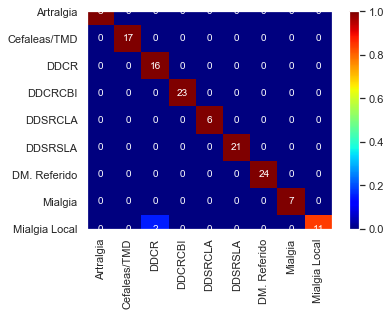

In [25]:
# We have to change one hot encoded values for real prediction values
#diagnosis_raw[np.argmax(predicted_value)]
#confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
pred = []
for i in y_pred :
    pred.append(diagnosis_raw[np.argmax(i)])
    
test = []
for i in y_test:
    test.append(diagnosis_raw[np.argmax(i)])

cm = confusion_matrix(test, pred)

norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
ax.grid(False)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape
for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center', color='white')

cb = fig.colorbar(res)
plt.xticks(range(width), np.unique(diagnosis_raw)[:width], rotation=90)
plt.yticks(range(height), np.unique(diagnosis_raw)[:height])

## Create model without training

In [36]:
classifier_1 = Sequential()
# First Hidden Layer
classifier_1.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=len(dataset.columns)))
classifier_1.add(Dropout(0.2))
# Second  Hidden Layer
classifier_1.add(Dense(32, activation='relu', kernel_initializer='random_normal'),)
classifier_1.add(Dropout(0.2))
# Output Layer
classifier_1.add(Dense(number_of_diseases, activation='softmax', kernel_initializer='random_normal'))
classifier_1.add(Dropout(0.2))
classifier_1.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
classifier_1.load_weights('saved_models/weights.best.hdf5')

## Implement a prediction function

In [40]:
def diagnosis(answers,classifier):
    predicted_value = classifier.predict(answers)
    return diagnosis_raw[np.argmax(predicted_value)]

print(diagnosis(X_test[:1],classifier_1))

DDSRSLA


## K-fold cross validation

In [32]:
# define 10-fold cross validation test harness
X = dataset
Y = pd.read_pickle('data/diagnosis.pkl')
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
for train, test in kfold.split(X, Y):
    
    # We have to use raw data before split and then on hot encode
    encoder.fit(Y[train])
    encoded_Y = encoder.transform(Y[train])
    dummy_y_train = np_utils.to_categorical(encoded_Y)
    
    encoder.fit(Y[test])
    encoded_Y = encoder.transform(Y[test])
    dummy_y_test = np_utils.to_categorical(encoded_Y)
     
    #Model
    classifier = Sequential()
    classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=len(dataset.columns)))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'),)
    classifier.add(Dropout(0.2))
    classifier.add(Dense(number_of_diseases, activation='softmax', kernel_initializer='random_normal'))
    classifier.add(Dropout(0.2))
    
    # Fit & evaluate
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    classifier.fit(X.iloc[train], dummy_y_train, validation_split=0.25, epochs=100, batch_size=10, verbose=0)
    scores = classifier.evaluate(X.iloc[test], dummy_y_test, verbose=0)
    print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 99.50%
acc: 99.49%
acc: 99.47%
acc: 99.73%
acc: 100.00%
acc: 100.00%
acc: 99.72%
acc: 100.00%
acc: 100.00%
acc: 99.72%
99.76% (+/- 0.21%)
